In [38]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Dimensionality Reduction via Feature Extraction

<font size=4> Reference: Chapter 5 of <i>Python Machine Learning</i> </font>

<div class="alert alert-block alert-info"><font color="#000000">
    
Reducing the dimensionality of the feature space not only allows learning algorithms to run much faster, but may also improve the predictive performance of a model, especially when our dataset contains a large number of features that contain noises.

There are two main categories of dimensionality reduction techniques: <b>feature selection</b> and <b>feature extraction</b>.  

- In feature selection, we select a subset of the original features that retain most of the information needed for a given machine learning task;

- In feature extraction, we derive information from the original features and construct new features.

We focus on feature extraction in this notebook.
</font></div>

<div class="alert alert-block alert-info"><font color="#000000">
Common solutions to reduce the generalization error are (see textbook page 123):

- Collect more training data

- Introduce a penalty for complexity via regularization

- Choose a simpler model with fewer parameters

- <b>Reduce the dimensionality of the data</b>
    
We use feature extraction to transform or project the data onto a new feature space.  Feature extraction can be understood as an approach to data compression with the goal of maintaining most of the relevant information.
</font></div>

### <font color="#0000E0"> Principal Component Analysis (PCA) </font>

<div class="alert alert-block alert-info"><font color="#000000">
PCA helps us to identify patterns in data based on the correlation between
features. In a nutshell, PCA aims to find the directions of maximum variance in
high-dimensional data and projects it onto a new subspace with equal or fewer
dimensions than the original one.
</font></div>

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True, linewidth=200)

### <font color="#0000E0"> Motivational Example </font>

<div class="alert alert-block alert-info"><font color="#000000">
Suppose we have a house dataset as shown below. The floor size and the total number of rooms have a high correlation, and all houses are built in the same year.  Therefore, most of the variations in the data occur along one dimension---very similar to the linear regression line.  The principal components are defined as the <b>directions of maximum variance</b> in the data.
</font></div>

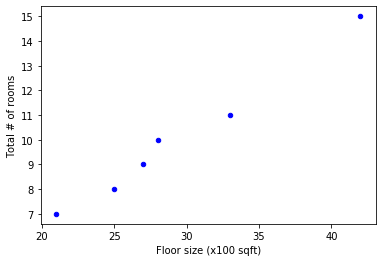

In [40]:
df = pd.DataFrame({'Floor size (x100 sqft)':[27, 42, 21, 25, 28, 33], 
                   'Total # of rooms':[9, 15, 7, 8, 10, 11],
                   'Year built':[2014, 2014, 2014, 2014, 2014, 2014]
                  } ) 
df.plot.scatter(x='Floor size (x100 sqft)', y='Total # of rooms', 
                color='blue')
plt.show()

<div class="alert alert-block alert-info"><font color="#000000">
PCA is a transformer, just like label encoder and standard scaler we used before.  Any transformer involves 'fit' and 'transform' steps. 
The transformation involves removing the mean of the data and 'rotating' the data.
</font></div>

In [41]:
data = df.to_numpy()

from sklearn.decomposition import PCA
pca = PCA()                     # PCA constructor
pca.fit(data)                   # Find principal components
data_pca = pca.transform(data)  # Transform data

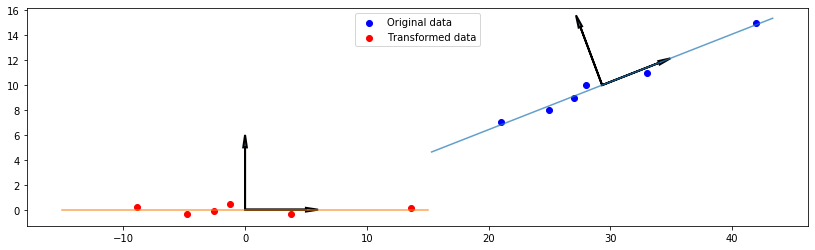

Principal components: 
 [[ 0.93379307  0.3578135   0.        ]
 [-0.3578135   0.93379307  0.        ]
 [-0.         -0.         -1.        ]]

Fraction of variance explained by the principal components:
 [0.99827964 0.00172036 0.        ]

Transformed data:
 [[-2.536664   -0.09889491  0.        ]
 [13.61711306  0.13666104  0.        ]
 [-8.85504942  0.18039994  0.        ]
 [-4.76206364 -0.31706098  0.        ]
 [-1.24505743  0.47708467  0.        ]
 [ 3.78172143 -0.37818976  0.        ]]


In [42]:
# Plotting the original data and transformed data
plt.figure(figsize=(14,4))
plt.scatter(data[:,0], data[:,1], color='blue', label='Original data')
plt.scatter(data_pca[:,0], data_pca[:,1], color='red', label='Transformed data')
l=15
plt.plot([pca.mean_[0] + l*pca.components_[0,0], pca.mean_[0] - l*pca.components_[0,0]], 
         [pca.mean_[1] + l*pca.components_[0,1], pca.mean_[1] - l*pca.components_[0,1]], alpha=0.7)
plt.plot([-l,l], [0,0], alpha=0.7)
al=5
plt.arrow(pca.mean_[0], pca.mean_[1], al*pca.components_[0,0], al*pca.components_[0,1], lw=2, head_width=0.3, head_length=1)
plt.arrow(pca.mean_[0], pca.mean_[1], al*pca.components_[1,0], al*pca.components_[1,1], lw=2, head_width=0.3, head_length=1)
plt.arrow(0, 0, al, 0, lw=2, head_width=0.3, head_length=1)
plt.arrow(0, 0, 0, al, lw=2, head_width=0.3, head_length=1)
plt.legend(loc='upper center')
plt.show()
print('Principal components: \n', pca.components_)
print('\nFraction of variance explained by the principal components:\n', pca.explained_variance_ratio_)
print('\nTransformed data:\n', data_pca)
np.sum(pca.components_**2, axis=1)

### <font color="#0000E0"> Load Wine Dataset </font>

<div class="alert alert-block alert-info"><font color="#000000">
The following block of codes are the same as before.
</font></div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True, linewidth=200)

winedf = pd.read_csv("wine.csv")

# Define Predictors and Target Variable
X = winedf.iloc[:, 1:].to_numpy()       # iloc selects data by index
y = winedf.loc[:, 'Class label'].to_numpy()

# Splitting Data into Training Set and Test Set
from sklearn.model_selection import train_test_split
testsize = 0.3
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=testsize, stratify=y, random_state=0)

# Standardizing data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100, solver='liblinear', multi_class='ovr')
lr = lr.fit(X_train_std, y_train)
lr.fit(X_train_std, y_train)
print("Training accuracy: ", lr.score(X_train_std, y_train))
print("Test accuracy: ", lr.score(X_test_std, y_test))

Training accuracy:  1.0
Test accuracy:  1.0


### <font color="#0000E0"> Explorary Data Analysis </font>

<div class="alert alert-block alert-info"><font color="#000000">
For any future new dataset, you can use the following techniques to explore the data: Pairwise scatter plot and correlation coefficient matrix shown in a heat map.
</font></div>

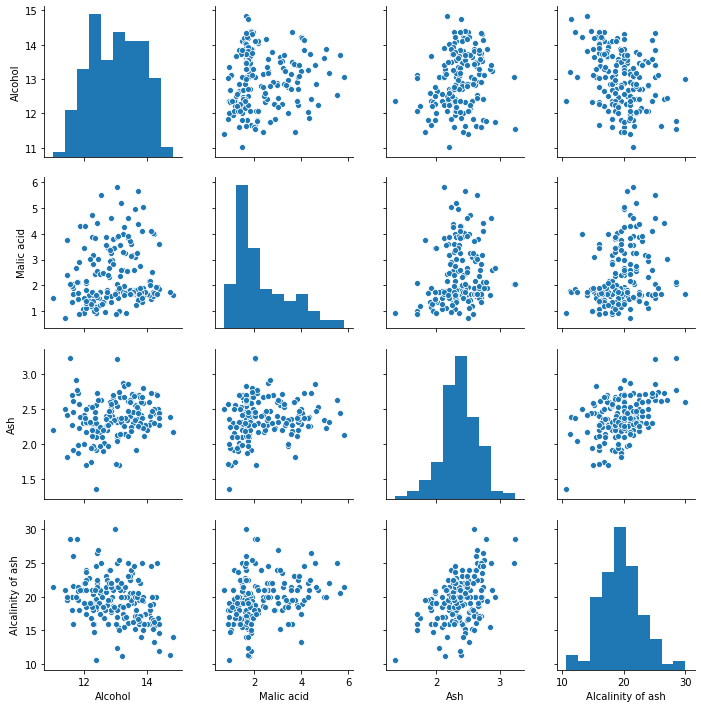

In [46]:
import seaborn as sns
sns.pairplot(winedf.iloc[:,1:5])  # this will take several minutes
plt.show()

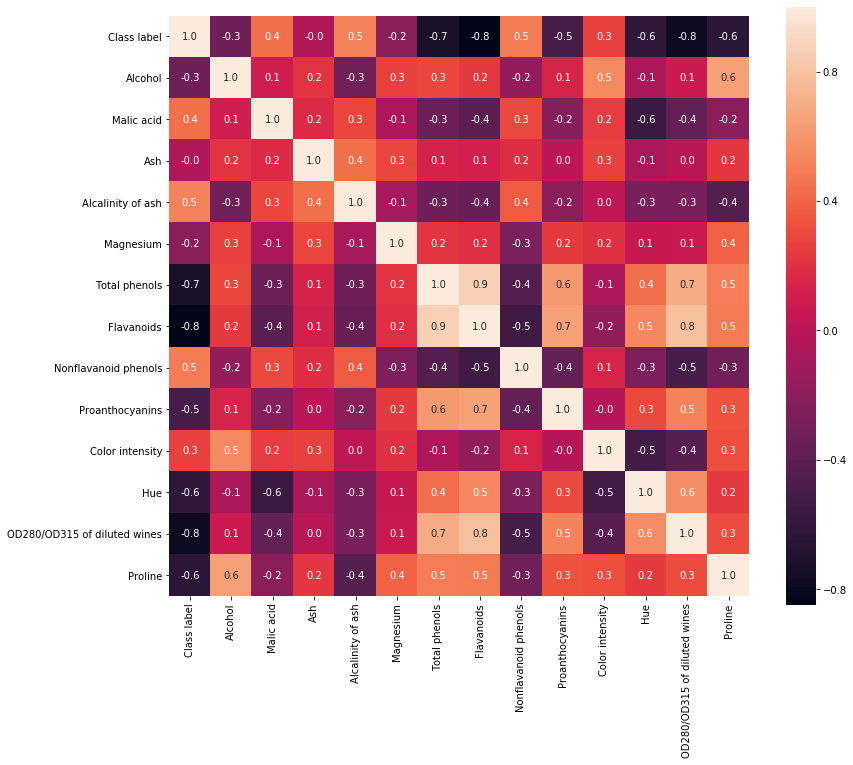

In [48]:
cm = np.corrcoef(winedf.to_numpy().T)

import seaborn as sns
#sns.set(font_scale=0.5)
plt.figure(figsize=(13,11))
sns.heatmap(cm, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 10}, 
            yticklabels=winedf.columns, xticklabels=winedf.columns)
plt.show()

### <font color="#0000E0"> Principal Components Analysis for Wine Data </font>

<div class="alert alert-block alert-info"><font color="#000000">
These are the principal components that improved our predictive model in the prevoius class.
</font></div>

Fraction of variance explained by each PC = [0.37  0.184 0.118 0.073 0.064 0.051 0.04  0.026 0.024 0.016 0.014 0.012 0.008]
Cumulative fraction of variance explained = [0.37  0.554 0.672 0.745 0.81  0.86  0.9   0.926 0.95  0.966 0.98  0.992 1.   ]


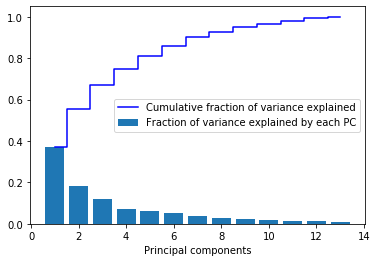

In [2]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train_std)

ev = pca.explained_variance_ratio_

with np.printoptions(precision=3):
    print('Fraction of variance explained by each PC =', ev)
    print('Cumulative fraction of variance explained =', np.cumsum(ev))

plt.bar (range(1, 14), ev, label='Fraction of variance explained by each PC')
plt.step(range(1, 14), np.cumsum(ev), where='mid', color='blue', 
         label='Cumulative fraction of variance explained')
plt.xlabel('Principal components')
plt.legend(loc='center right')
plt.show()

In [12]:
# check that the variance of the extracted features are indeed consistent with the above explained_variance_ratio_
stdev = pca.transform(X_train_std).std(axis=0)
stdev**2 / sum(stdev**2)

array([0.36951469, 0.18434927, 0.11815159, 0.07334252, 0.06422108, 0.05051724, 0.03954654, 0.02643918, 0.02389319, 0.01629614, 0.01380021, 0.01172226, 0.00820609])

In [55]:
 winedf.columns[1:]

Index(['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
       'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')

In [50]:
print(np.vstack((np.round(pca.components_[0],2), winedf.columns[1:])).T)
#np.sum(pca.components_**2, axis=1)

[[-0.14 'Alcohol']
 [0.25 'Malic acid']
 [-0.03 'Ash']
 [0.21 'Alcalinity of ash']
 [-0.15 'Magnesium']
 [-0.39 'Total phenols']
 [-0.42 'Flavanoids']
 [0.31 'Nonflavanoid phenols']
 [-0.31 'Proanthocyanins']
 [0.08 'Color intensity']
 [-0.33 'Hue']
 [-0.37 'OD280/OD315 of diluted wines']
 [-0.3 'Proline']]


### <font color="#0000E0"> Reducing Dimensions to Two: Extracting Two New Features </font>

<div class="alert alert-block alert-info"><font color="#000000">
We will only use the two most important features extracted.
</font></div>

In [56]:
pca = PCA(n_components=2)
pca.fit(X_train_std)
pca.transform(X_train_std)

array([[ 2.38299011,  0.45458499],
       [-1.96578183,  1.65376939],
       [-2.53907598,  1.02909066],
       [-1.43010776,  0.6024011 ],
       [ 3.14147227,  0.66214979],
       [ 0.50253552, -2.08907131],
       [ 0.04867722, -2.27536044],
       [ 2.47888989, -0.08603318],
       [ 2.01900259, -1.3538719 ],
       [ 0.75156583, -2.55367947],
       [ 0.72268915, -1.18404391],
       [-3.00366211,  0.94626934],
       [ 2.57518878, -1.0697549 ],
       [ 3.73151104,  1.01968876],
       [-1.12276518,  0.13877   ],
       [ 2.85996853,  2.28819559],
       [-0.74717125, -3.21746061],
       [-1.58427878,  0.16048055],
       [ 3.38887101,  2.11550689],
       [ 3.15405473,  0.54233966],
       [-1.28036506, -1.72926871],
       [-1.71438911,  0.71745249],
       [-1.55040291, -1.7580591 ],
       [ 1.10984489, -1.20480693],
       [-0.69108418, -1.71385374],
       [-2.086036  , -1.68453671],
       [ 2.90393456,  1.95258805],
       [-2.07635784,  1.47183304],
       [-1.74756185,

<div class="alert alert-block alert-info"><font color="#000000">
PCA is unsupervised dimensionality reduction.  It views the data from a "view point" that sees most of the variance.   If classes are unknown, a clustering analysis can follow to identify clusters (each cluster has data with similar features).
</font></div>

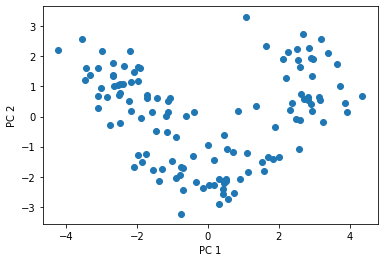

In [57]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

In [58]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, resolution=0.02,
                         labels=['Feature 1', 'Feature 2']):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    fig,axs = plt.subplots(1,2,figsize=(12,5))
    
    for k in range(2):
        axs[k].contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
        axs[k].set_xlim(xx1.min(), xx1.max())
        axs[k].set_ylim(xx2.min(), xx2.max())

    train_idx=range(0,int(np.rint(samplesize*(1-testsize))))
    test_idx =range(int(np.rint(samplesize*(1-testsize))), samplesize)

    X_train,y_train= X[train_idx,:], y[train_idx]
    X_test, y_test = X[test_idx,:], y[test_idx]
    
    for idx, cl in enumerate(np.unique(y)):
        axs[0].scatter(x=X_train[y_train == cl, 0], 
                    y=X_train[y_train == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')
        axs[1].scatter(x=X_test[y_test == cl, 0], 
                    y=X_test[y_test == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    for k in range(2):
        axs[k].set_xlabel(labels[0])
        axs[k].set_ylabel(labels[1])
        axs[k].legend(loc='lower left')

    axs[0].set_title('Training data')
    axs[1].set_title('Test data')

In [60]:
X_train_pca.shape

(124, 2)

In [61]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100, solver='liblinear', multi_class='ovr')
lr.fit(X_train_pca, y_train)
#svm = SVC(kernel='rbf', C=10, gamma=0.05)
#svm.fit(X_train_pca, y_train)

print("Training accuracy: ", lr.score(X_train_pca, y_train))
print("Test accuracy: ", lr.score(X_test_pca, y_test))

Training accuracy:  0.9758064516129032
Test accuracy:  0.9259259259259259


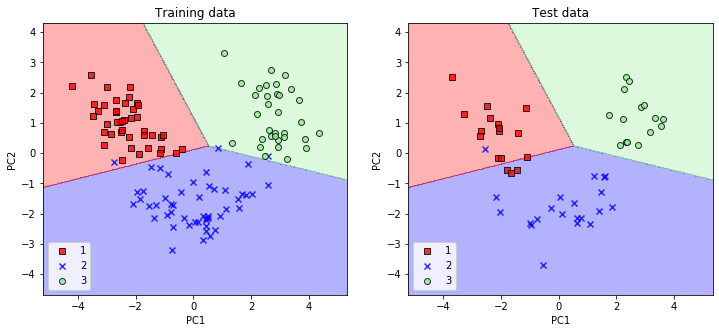

In [62]:
samplesize = len(y)

X_combined_pca = np.vstack((X_train_pca, X_test_pca))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined_pca, y_combined, classifier=lr, labels=['PC1', 'PC2'])

<div class="alert alert-block alert-info"><font color="#000000">
In the following block, we pick two existing features to make prediction.  You can try picking differet features, and you'll see that any two existing features are poorer predictors compared to the two new features extracted from PCA.
</font></div>

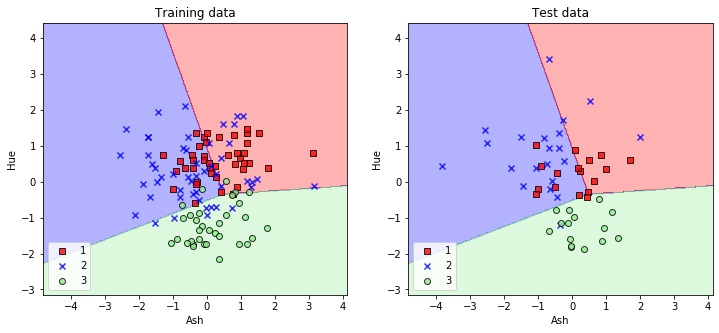

Training accuracy:  0.6290322580645161
Test accuracy:  0.7222222222222222


In [66]:
# Define Predictors and Target Variable
columns = [3,11]
X = winedf.iloc[:, columns].to_numpy()
y = winedf.loc[:, 'Class label'].to_numpy()

# Splitting Data into Training Set and Test Set
from sklearn.model_selection import train_test_split
testsize = 0.3
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=testsize, stratify=y, random_state=0)

# Standardizing data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std2 = sc.transform(X_train)
X_test_std2 = sc.transform(X_test)

# Model fitting and testing
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=10, solver='liblinear', multi_class='ovr', 
                        random_state=1)
lr.fit(X_train_std2, y_train)

X_combined_std = np.vstack((X_train_std2, X_test_std2))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined_std, y_combined, classifier=lr, 
                      labels=winedf.columns[columns])
plt.show()
print("Training accuracy: ", lr.score(X_train_std2, y_train))
print("Test accuracy: ", lr.score(X_test_std2, y_test))

## <font color="#0000E0"> Linear Discriminant Analysis </font>

<div class="alert alert-block alert-info"><font color="#000000">
In PCA, we are searching for the directions of maximum variance in the data, without using the data labels.  It is an unsupervised learning.

In the following figure, if data are not labeled, PCA will identify 'Dim 1' as the direction that maximize the variance explained.  However, 'Dim 1' does not help us much to separate the two classes.  'Dim 2' will be much more informative for classification.
</font></div>

<img src="LDA.png" width="500">

Training accuracy:  0.9919354838709677
Test accuracy:  1.0


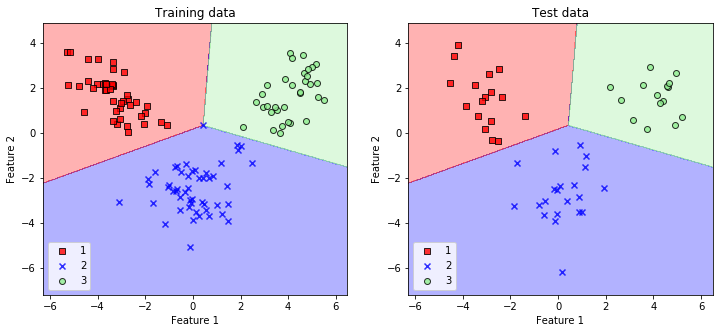

In [67]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)
X_test_lda = lda.transform(X_test_std)

lr = LogisticRegression(C=10, solver='liblinear', multi_class='ovr')
lr.fit(X_train_lda, y_train)

print("Training accuracy: ", lr.score(X_train_lda, y_train))
print("Test accuracy: ", lr.score(X_test_lda, y_test))

samplesize = len(y)

X_combined_lda = np.vstack((X_train_lda, X_test_lda))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined_lda, y_combined, classifier=lr)

Training accuracy:  1.0
Test accuracy:  1.0


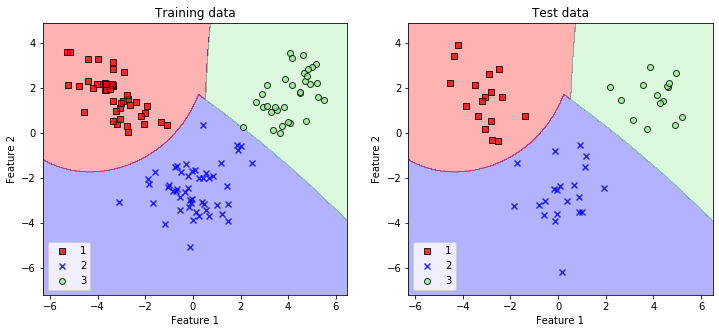

In [68]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)
X_test_lda = lda.transform(X_test_std)

from sklearn.svm import SVC
svm = SVC(kernel='rbf', C=10, gamma=0.04)
svm.fit(X_train_lda, y_train)

print("Training accuracy: ", svm.score(X_train_lda, y_train))
print("Test accuracy: ", svm.score(X_test_lda, y_test))

samplesize = len(y)

X_combined_lda = np.vstack((X_train_lda, X_test_lda))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined_lda, y_combined, classifier=svm)

In [69]:
lda = LDA()
lda.fit(X_train_std, y_train)

ev = lda.explained_variance_ratio_

with np.printoptions(precision=3):
    print('Fraction of variance explained by each component =', ev)
    print('Cumulative fraction of variance explained        =', np.cumsum(ev))


Fraction of variance explained by each component = [0.662 0.338]
Cumulative fraction of variance explained        = [0.662 1.   ]
